#### Model domain : single stream:  Length = 1000 m, Width = 1 m, dx = 10 m, dy= 1 m, Q = 0.1 m$^3$/sec
#### Mesh : generated logical mesh
#### Diffusion = 0.2 m$^2$/sec, Dispersion = 0
#### Bondary condition : prescribed concentration at the inlet boundary face (x=0 m)
#### Initial condition : zero concentration
#### Simulation time : 8 hours
#### Chemsitry: radioactive decay
#### Comparison with PFloTran radioactive decay test at the middle (x=49 m) of the stream 
#### Plotting: Times series of PFloTran and ATS Tracer1 and Tracer2 concentrations in Moles/Liter at x = 49 m

In [1]:
import sys, os, math, h5py, csv
import matplotlib.pyplot as plt
from scipy import integrate
import numpy as np

sys.path.append('/Users/ajc/Core/codes/simulator/debug/ats/tools/utils')
import read_helper as read

In [2]:
path = '/Users/ajc/FUSE/simulations/tests/ats-demos/13_reactive_transport/01_stream_logical'

In [3]:
# Read PFOTRAN standalone data
pflotran_file = os.path.join(path, 'data/pflotran_out/decay_ingrowth.tec')
pflotran_data = dict()
pflotran_data['time'] = np.loadtxt(pflotran_file,usecols=0,skiprows=6) #time in hours
pflotran_data['Tracer 1'] = np.loadtxt(pflotran_file,usecols=1,skiprows=6)  # Tracer 1
pflotran_data['Tracer 2'] = np.loadtxt(pflotran_file,usecols=2,skiprows=6)  # Tracer 1

In [12]:
F =['test']
Files = [os.path.join(path,f,'visdump_surface_data.h5') for f in F]
vars = ['surface-total_component_concentration', 'surface-total_component_concentration']
Suffix = ['.cell.Tracer1', '.cell.Tracer2']

In [13]:
Colors = ['r','k','b','b','c','m']
F_L = ['Tracer 1', 'Tracer 2']

In [14]:
#%matplotlib tk
def plot_surface_outlet(cell_id=-1):
    fig, axs = plt.subplots(1,1, figsize=(6,4), facecolor='w', edgecolor='k',gridspec_kw={'width_ratios':[1]})
    fig.subplots_adjust(hspace =.02, wspace=1.02)
    plt.tight_layout()
    #axs = axs.ravel()
    
    sum1 = 0
    for i, v in enumerate(vars):
        plt.subplot(111)
        for j,f in enumerate(Files):
            data = np.array(read.GetSurfVarFromVis(f,v,cellid=cell_id,suffix=Suffix[i])[v])
            Time = np.array([240*i/3600. for i in range(len(data))])
            plt.plot(Time, 1.e-3*data,color=Colors[i],label=F_L[i]) # convert ATS moles/second to Pflotran moles/litre
            sum1 = sum1 + 1e-3*data[-1]
        plt.ylabel(vars[i])

        plt.xlabel('Time [h]')

    plt.plot(pflotran_data['time'], pflotran_data['Tracer 1'],'r',linestyle='--',label='PFLOTRAN Tracer 1')
    plt.plot(pflotran_data['time'], pflotran_data['Tracer 2'],'k',linestyle='--',label='PFLOTRAN Tracer 2')
    plt.legend(loc='lower right',fontsize=10)
    plt.show()

/Users/ajc/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


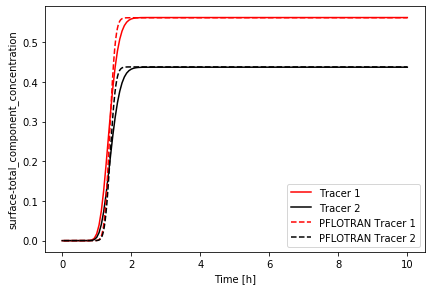

In [15]:
plot_surface_outlet(cell_id=49)